In [1]:
%matplotlib inline 
#import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

# Reprezentacja obrazów

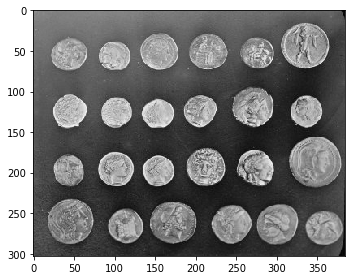

In [2]:
coins = data.coins()
io.imshow(coins)

In [3]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [4]:
type(coins)

numpy.ndarray

In [5]:
coins.shape

(303, 384)

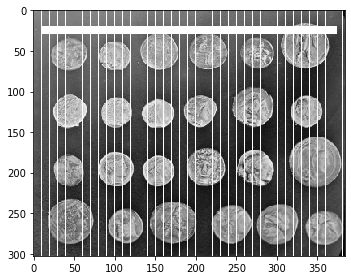

In [6]:
coins = data.coins()
coins[20:30, 10:-10] = 255
coins[::1, ::10] = 255
io.imshow(coins)

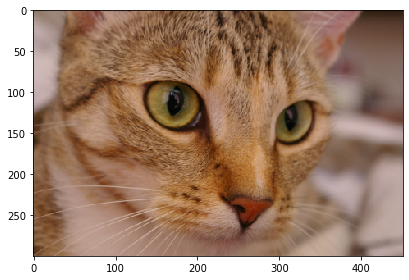

In [7]:
chelsea = data.chelsea()
io.imshow(chelsea)

In [8]:
chelsea.shape

(300, 451, 3)

In [9]:
chelsea[:4,:4,:]

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        [141, 118, 102]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        [142, 119, 103]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        [145, 121, 108]],

       [[151, 129, 116],
        [149, 127, 114],
        [147, 125, 112],
        [147, 125, 112]]], dtype=uint8)

In [10]:
chelsea = data.chelsea()
tmp = rgb2hsv(chelsea)
warnings.simplefilter("ignore")
tmp[:,:,1] = 0
io.imshow(hsv2rgb(tmp))
#tmp

NameError: name 'warnings' is not defined

In [11]:
chelsea = data.chelsea()
def on_change(x=0):
    tmp = rgb2hsv(chelsea)
    tmp[:,:,0] = x
    io.imshow(hsv2rgb(tmp))
    flush_figures()
    
interact(on_change, x=(0.0,1.0, 0.01))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.on_change(x=0)>

In [12]:
#chelsea = data.chelsea()
#tmp = rgb2gray(chelsea)
#ski.io.Image(hsv2rgb(tmp))

array([[0.48523098, 0.48523098, 0.47738784, ..., 0.11692392, 0.11692392,
        0.11692392],
       [0.49699569, 0.49307412, 0.48523098, ..., 0.12336824, 0.1225349 ,
        0.1272898 ],
       [0.50849255, 0.50457098, 0.49475569, ..., 0.12336039, 0.12728196,
        0.13120353],
       ...,
       [0.24786745, 0.29884784, 0.40501294, ..., 0.58914824, 0.58914824,
        0.58914824],
       [0.38173647, 0.42487373, 0.39628392, ..., 0.57403529, 0.57403529,
        0.57795686],
       [0.42487373, 0.36883294, 0.36042431, ..., 0.55442745, 0.55442745,
        0.55834902]])

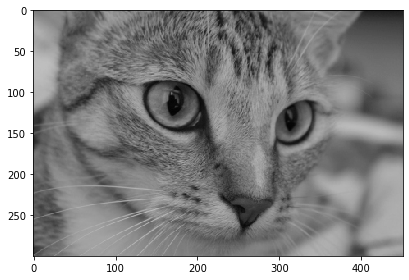

In [13]:
chelsea = data.chelsea()
tmp = rgb2gray(chelsea)
io.imshow(tmp)
tmp.shape
tmp

In [14]:
type(chelsea)

numpy.ndarray

## Inne operacje macierzowe

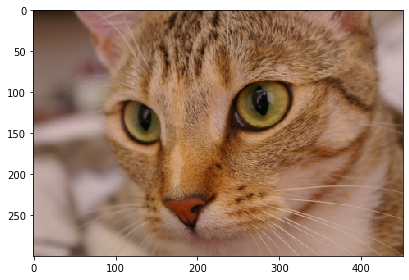

In [15]:
# Odbicie lustrzane
chelsea = data.chelsea()
io.imshow(chelsea[:,::-1])

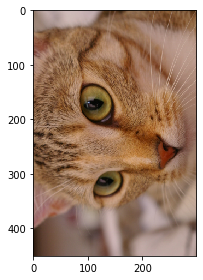

In [16]:
# Swap axes 0 and 1 (do not change 2)
chelsea = data.chelsea()
io.imshow(chelsea.transpose(1,0,2))

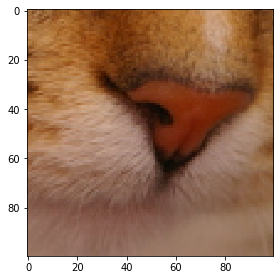

In [17]:
# Wycięcie
chelsea = data.chelsea()
io.imshow(chelsea[200:300,200:300])

In [18]:
http://scikit-image.org/docs/dev/auto_examples/applications/plot_geometric.html

SyntaxError: invalid syntax (<ipython-input-18-9404e425d4e3>, line 1)

# Proste przetwarzanie

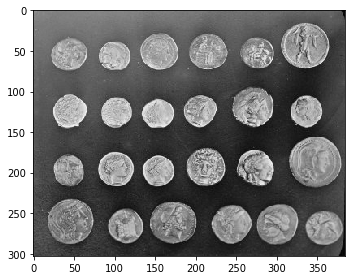

In [19]:
coins = data.coins()
io.imshow(coins)

In [20]:
# Proste statystyki
np.mean(coins), np.std(coins)

(96.85551602035204, 52.87981861986824)

### Progowanie

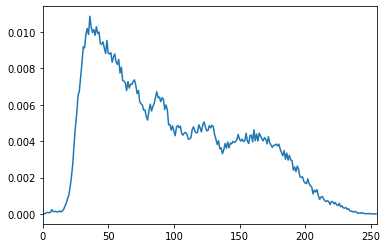

In [21]:
# Histogram
coins = data.coins()

def plot_hist(img):
    img = img_as_ubyte(img)
    histo, x = np.histogram(img, range(0, 256), density=True)
    plot(histo)
    xlim(0, 255)
    
plot_hist(coins)

## Operacje punktowe

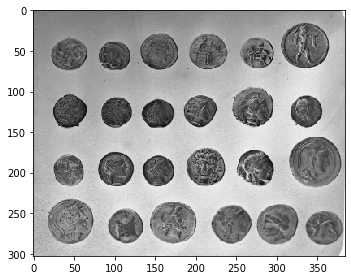

In [22]:
# B[i,j] = g(A[i,j]) dla każdego i,j
# Negacja
io.imshow(255-coins)

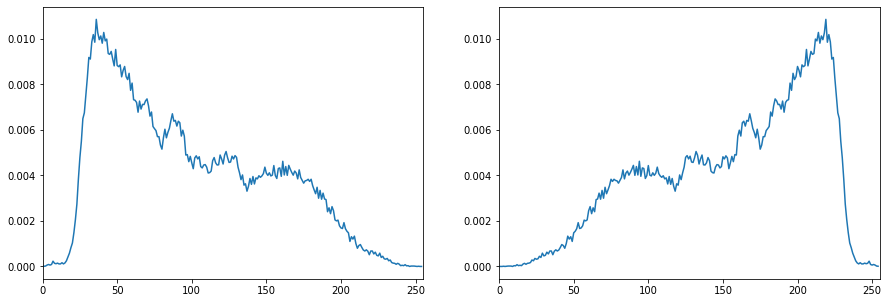

In [23]:
# Co się dzieje z histogramami?
figure(figsize=(15,5))
subplot(1,2,1); plot_hist(coins)
subplot(1,2,2); plot_hist(255-coins)

In [27]:
def thresh(t):
    #warnings.simplefilter("ignore")
    binary = (coins > t) * 255
    binary = np.uint8(binary)
    io.imshow(binary)
    #flush_figures()

interact(thresh, t=(0,255,5))


interactive(children=(IntSlider(value=125, description='t', max=255, step=5), Output()), _dom_classes=('widget…

<function __main__.thresh(t)>

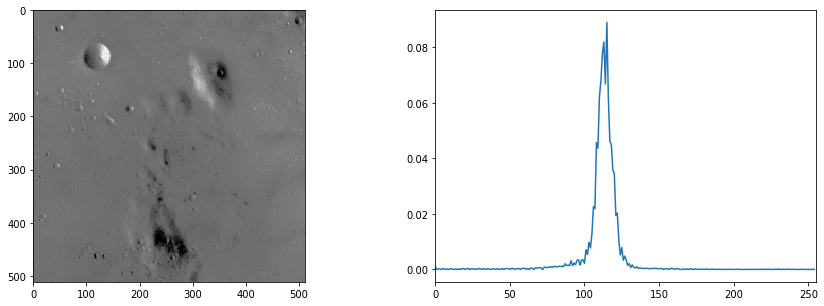

In [25]:

img = data.moon()
#imgplot = plt.imshow(data.moon())
#imgplot.set_cmap('nipy_spectral')

figure(figsize=(15,5))
subplot(1,2,1); plt.imshow(data.moon(), cmap='gray')
subplot(1,2,2); plot_hist(img)

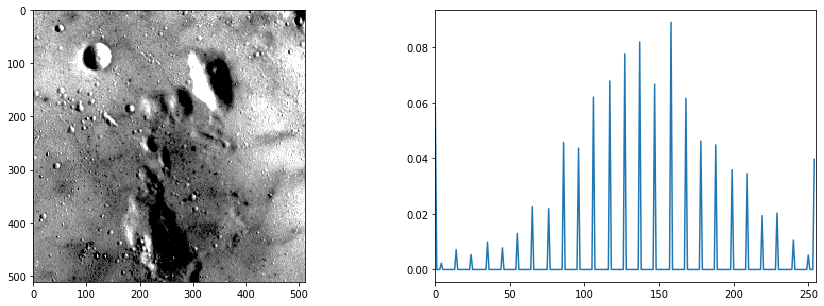

In [26]:
img = img_as_float(data.moon())
MIN = 100 / 256
MAX = 125 / 256

norm = (img - MIN) / (MAX - MIN)
norm[norm > 1] = 1
norm[norm < 0] = 0

figure(figsize=(15,5))
subplot(1,2,1); plt.imshow(norm, cmap='gray')
subplot(1,2,2); plot_hist(norm)

In [ ]:
img = img_as_float(data.moon())

@interact(perc=(0,10,0.5))
def on_change(perc=0):
    MIN = np.percentile(img, perc)
    MAX = np.percentile(img, 100-perc)
    #Percentyl – kwantyl rzędu k/100, gdzie k=1, … , 99.
    #Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0

    figure(figsize=(15,5))
    subplot(1,2,1); plt.imshow(norm, cmap='gray')
    subplot(1,2,2); plot_hist(norm)
    flush_figures()

In [ ]:
# Operacje punktowe można wygodnie wyświetlić
def identity(v):
    return v

def negate(v):
    return 255-v

def get_thresh(th):
    def thresh(v):
        return 255*(v>th)
    return thresh

def plot_point_op(fun):
    xlim(-5, 260)
    ylim(-5, 260)
    plot([fun(v) for v in np.arange(0,256)])
    
figure(figsize=(15,4))
subplot(2,2,1); plot_point_op(identity)
subplot(2,2,2); plot_point_op(negate)
subplot(2,2,3); plot_point_op(get_thresh(64))
subplot(2,2,4); plot_point_op(get_thresh(128))

In [ ]:
# Krzywa gamma
img = img_as_float(data.coins())
io.imshow(img)

In [ ]:
img = img_as_float(data.coins())
#io.imshow(img)
def get_gamma_fun(g):
    def gamma(v):
        return 255*((v/255)**g)
    return gamma

@interact(gamma=(-1,10,0.1))
def on_change(gamma=1):
    tmp = img ** gamma
    
    figure(figsize=(15,5))
 
    subplot(1,3,1); plt.imshow(tmp, cmap='gray')
    subplot(1,3,2); plot_hist(tmp)
    subplot(1,3,3); plot_point_op(get_gamma_fun(gamma))
    flush_figures()
    

In [ ]:
figure()
plot_point_op(get_gamma_fun(0.3))
plot_point_op(get_gamma_fun(0.5))
plot_point_op(get_gamma_fun(1.0))
plot_point_op(get_gamma_fun(4))
legend((0.3, 0.5, 1.0, 4), loc='best')

figure(figsize=(15,15))
subplot(2,2,1); title('gamma = 0.3'); plt.imshow(coins**0.3, cmap='gray')
subplot(2,2,2); title('gamma = 0.5'); plt.imshow(coins**0.5, cmap='gray')
subplot(2,2,3); title('gamma = 1.0'); plt.imshow(coins**1.0, cmap='gray')
subplot(2,2,4); title('gamma = 4.0'); plt.imshow(coins**4.0, cmap='gray')

## Konwolucja (splot)

In [ ]:
#io.imshow(io.imread('convolution.png'), aspect='auto')

dt = io.imread('convolution.png')
fig = plt.figure(figsize = (20,13))
ax = fig.add_subplot(111)
ax.imshow(dt, interpolation='nearest')
#ax.set_aspect(5)
plt.show()


## Filtry

In [ ]:
img = data.page()
img = img_as_float(img)
io.imshow(img)

In [ ]:
img

In [ ]:
from skimage.filters.edges import convolve

#K = array([[1,1,1],
#           [1,1,1],
#           [1,1,1]])
SIZE=10

K = ones([SIZE,SIZE])
#print(K)
K = K / sum(K) # Dlaczego przez 9?
res = convolve(img, K)
io.imshow(res)
# Co będzie jeśli zastosujemy wielokrotnie?

In [ ]:
from skimage.filters.edges import convolve

K = ones([3,3])
K = K / sum(K) 

def func(t = 1):
    res = convolve(img, K)
    for t in range(0, t):
        res = convolve(res, K)
    io.imshow(res)
    flush_figures()
    
interact(func, t=(1,20,1))

In [ ]:
cam = img_as_float(data.camera())
io.imshow(cam)

In [ ]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [-1,-2,-1]])
K = K / 4                       # Dlaczego przez 4?

res = np.abs(convolve(cam, K))  # Dlaczego abs?
io.imshow(res)

In [ ]:
img = zeros([6,6])
img[2,:] = 1
img[:,2] = 1
figure(figsize=(8,8))
io.imshow(img)

In [ ]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [ -1,-2,-1]])
K = K / 4
res = convolve(img, K)
figure(figsize=(8,8))
io.imshow(res)

In [ ]:
K = array([[ 1, 2, 1],
           [ 0, 0, 0],
           [-1,-2,-1]])
K = K / 8
res = convolve(cam, K)
figure(figsize=(8,8))
io.imshow(res)

In [ ]:
img = zeros([6,6])
img[2,:] = 1
img[:,2] = 1
figure(figsize=(8,8))
io.imshow(img)

In [ ]:
K = array([[ 1, 0,-1],
           [ 2, 0,-2],
           [ 1, 0,-1]])

K = K / 4
res = convolve(img, K)
figure(figsize=(8,8))
io.imshow(res)

In [ ]:
img = img_as_float(data.camera())

figure(figsize=(16,8))
subplot(1,2,1); io.imshow(img)

Kh = array([[ 1, 2, 1],
            [ 0, 0, 0],
            [-1,-2,-1]]) 
Kh = Kh / 4

Kv = array([[ 1, 0,-1],
            [ 2, 0,-2],
            [ 1, 0,-1]])
Kv = Kv / 4


hor = np.abs(convolve(img, Kh))
ver = np.abs(convolve(img, Kv))
#res = np.sqrt(hor**2 + ver**2)

#res = np.sqrt(hor*0.5 + ver*0.5)
res = (hor+ver)/2

subplot(1,2,2); io.imshow(res)

In [ ]:
# Inne filtry wykrywające krawędzie: Roberts, Previtt
#K = array([[ 1, 0],
#           [ 0, -1]])
K = array([[ 1, 1, 0],
           [ 1, 0, -1],
           [ 0, -1, -1]])
K = K / 2                       
res = np.abs(convolve(cam, K))
io.imshow(res)

## Używając skimage

In [ ]:
#warnings.simplefilter("ignore")
figure(figsize=(30,30))
subplot(1,3,1); io.imshow(filters.sobel_v(cam))
subplot(1,3,2); io.imshow(filters.sobel_h(cam))
subplot(1,3,3); io.imshow(filters.sobel(cam))

In [ ]:
figure(figsize=(20,20))
subplot(1,2,1); io.imshow(data.coins())
subplot(1,2,2); io.imshow(filters.sobel(data.coins()))

## Odszumianie

In [ ]:
img = rgb2gray(data.astronaut())
io.imshow(img)

In [ ]:
def getHist(img, ax_hist, bins=256):
   
    out = ski.img_as_float(img)
    # Display histogram
    ax_hist.hist(out.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(-0.1, 1.1)
    ax_hist.set_yticks([])
    return ax_hist

def singlePlot(img):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].imshow(img[idx], cmap=plt.cm.gray)
    getHist(img[idx], axes[1])
    

In [ ]:
img = rgb2gray(data.astronaut())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(img, cmap=plt.cm.gray)
getHist(img, axes[1])
#print(np.mean(img))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(noise_prop = 0.0):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    imgProc = util.random_noise(img[idx], mode='s&p', amount=noise_prop)
    axes[0].imshow(imgProc, cmap=plt.cm.gray)
    getHist(imgProc, axes[1])
    flush_figures()
    
interact(func, noise_prop=(0.0, 0.5 ,0.1))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(mean=0, var=0.01):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    imgProc = util.random_noise(img[idx], mode='gaussian', mean=mean, var=var)
    #io.imshow(imgProc)
    axes[0].imshow(imgProc, cmap=plt.cm.gray)
    getHist(imgProc, axes[1])
    flush_figures()
interact(func, mean=(-0.8, 0.8,0.1), var=(0.0,0.3,0.1))

In [ ]:
io.imshow(io.imread('http://tracer.lcc.uma.es/problems/mfp/MedianFilter.jpg'))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(r = 0, noise_prop = 0.0):
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    imgProc = util.random_noise(img[idx], mode='s&p', amount=noise_prop)    
    out = filters.median(imgProc, disk(r))
    #out = imgProc
    axes[0].imshow(out, cmap=plt.cm.gray)
    getHist(out, axes[1])
    flush_figures()

interact(func, r=(0,20,1), noise_prop=(0.0,1.0,0.1))



In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(r = 0,  mean = 0, var=0.0):
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    imgProc = util.random_noise(img[idx], mode='gaussian',  mean=mean, var=var)
    out = filters.median(imgProc, disk(r))
    axes[0].imshow(out, cmap=plt.cm.gray)
    getHist(out, axes[1])
    flush_figures()

interact(func, r=(0,20,1), mean=(-0.8, 0.8,0.1), var=(0.0,0.3,0.1))

In [ ]:
figure(figsize=(20,20))
subplot(1,2,1)
io.imshow(io.imread('http://www.mathworks.com/help/releases/R2013b/images/gaussian.png'))
subplot(1,2,2)
io.imshow(io.imread('http://4.bp.blogspot.com/_qEs9r36R5kw/S63QM-0V6kI/AAAAAAAAArY/9AQI1izF9Wk/s320/Picture+2.png'))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(r = 0, noise_prop = 0.0):
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    imgProc = util.random_noise(img[idx], mode='s&p', amount=noise_prop)    
    out = filters.gaussian_filter(imgProc, sigma=r)
    axes[0].imshow(out, cmap=plt.cm.gray)
    getHist(out, axes[1])
    flush_figures()

interact(func, r=(0,20,1), noise_prop=(0.0,0.5,0.1))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

def func(r = 0, mean = 0, var=0.00):
    
    imgProc = util.random_noise(img[idx], mode='gaussian', mean=mean, var=var)
    io.imshow(imgProc)
    
    warnings.simplefilter("ignore")
    out = filters.gaussian_filter(imgProc, sigma=r)
    io.imshow(out)
    flush_figures()
    
interact(func, r=(0,20,1), mean=(-0.8, 0.8,0.1), var=(0.0,0.3,0.1))



## Filtr Canny

In [ ]:
warnings.simplefilter("ignore")
img = rgb2gray(data.imread('noisy.png'))
#img = im
figure(figsize=(20,20))
subplot(1,3,1)
io.imshow(img)
subplot(1,3,2)
io.imshow(filters.sobel(img))
subplot(1,3,3)

from skimage import feature
io.imshow(ski.feature.canny(img, sigma=3))

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0

#imgProc = filters.sobel(img[idx])
imgProc = ski.feature.canny(img[idx], sigma=3)
io.imshow(imgProc)

In [ ]:
img = [rgb2gray(data.astronaut()), rgb2gray(data.coins())]
idx = 0 ####

def func(s = 1):
    imgProc = ski.feature.canny(img[idx], sigma=s)
    io.imshow(imgProc)
    flush_figures()
    
interact(func, s=(1,10,1))

# Operacje Morfologiczne

## Dylatacja

In [ ]:
dt = io.imread('https://upload.wikimedia.org/wikipedia/commons/2/2c/Dylatacja_przyklad.png')
fig = plt.figure(figsize = (20,13))
ax = fig.add_subplot(111)
ax.imshow(dt, interpolation='nearest')
#ax.set_aspect(5)
plt.show()

In [ ]:
img = zeros([10,10])
img[2:5,2:4] = 1
img[6:8,5:9] = 1
img[3:8,5:6] = 1
img[3:4,2:5] = 1
figure(figsize=(8,8))
io.imshow(img)

In [ ]:
img = mp.dilation(img)
io.imshow(img)

# Erozja

In [28]:
dt = io.imread('https://upload.wikimedia.org/wikipedia/commons/f/f0/Erozja_przyklad.png')
fig = plt.figure(figsize = (20,13))
ax = fig.add_subplot(111)
ax.imshow(dt, interpolation='nearest')
#ax.set_aspect(5)
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:749)>

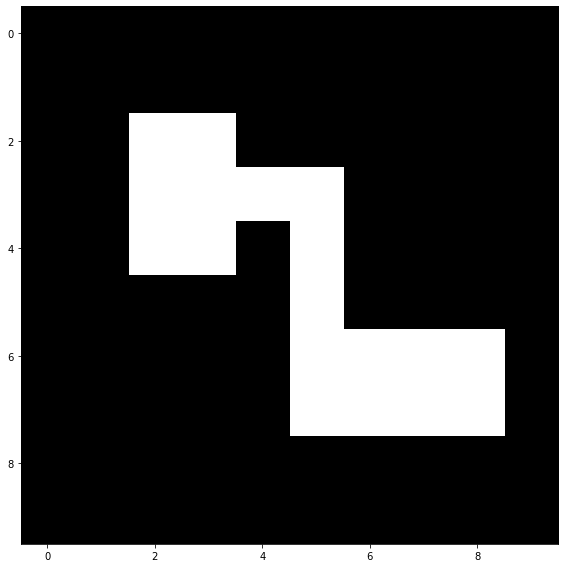

In [30]:
img = zeros([10,10])
img[2:5,2:4] = 1
img[6:8,5:9] = 1
img[3:8,5:6] = 1
img[3:4,2:5] = 1
figure(figsize=(8,8))
io.imshow(img)

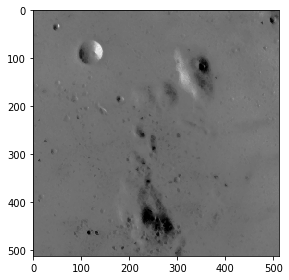

In [29]:
K = array([[ 0, 1, 0],
            [ 1, 1, 1],
            [ 0, 1, 0]])

img = mp.erosion(img, selem=K)
io.imshow(img, cmap='gray')

# Otwarcie

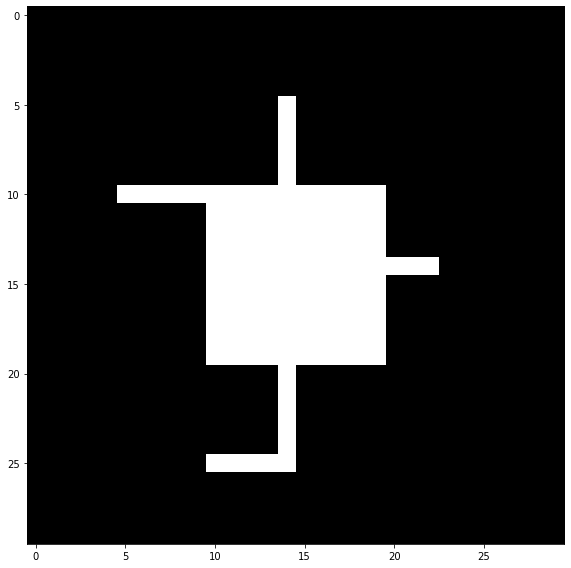

In [31]:
img = zeros([30,30])
img[10:20,10:20] = 1

img[10:11,5:10] = 1
img[5:10,14:15] = 1
img[14:15,20:23] = 1
img[20:26,14:15] = 1
img[25:26,10:15] = 1
figure(figsize=(8,8))
io.imshow(img)

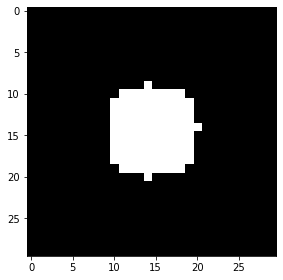

In [32]:
img = mp.dilation(mp.erosion(img))
io.imshow(img)


# Zamkniecie

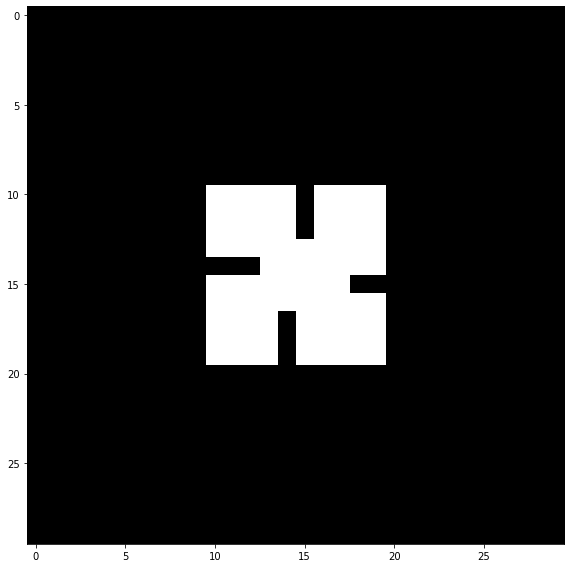

In [33]:
img = zeros([30,30])
img[10:20,10:20] = 1

img[10:13,15:16] = 0
img[17:20,14:15] = 0
img[14:15,10:13] = 0
img[15:16,18:20] = 0

figure(figsize=(8,8))
io.imshow(img)

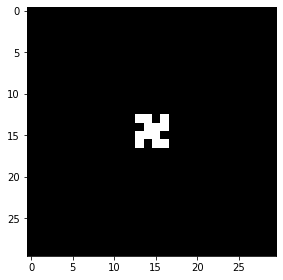

In [37]:
img = mp.erosion(img)
img = mp.erosion(img)
io.imshow(img)

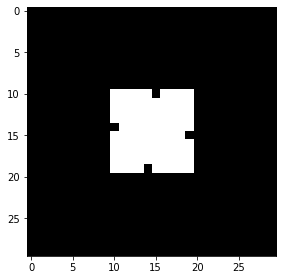

In [35]:
#OTWARCIE/ZAMKNIECIE - TEN SAM EFEKT PO KILKU OPERACJACH (IDEMPOTENCJA)
img = mp.erosion(mp.dilation(img))
img = mp.erosion(mp.dilation(img))
img = mp.erosion(mp.dilation(img))
io.imshow(img)